# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = 'demo01.csv'

dados = pd.read_csv(df)

print(dados.head())

  sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    F                N               Y           0  Commercial associate   
3    M                Y               Y           0               Working   
4    F                Y               N           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education               Married  House / apartment   
4              Incomplete higher               Married  House / apartment   

       idade  tempo_emprego  possui_celular  possui_fone_comercial  \
0  5

In [11]:
# Exibindo informações sobre o DataFrame
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [12]:
# Verificando a quantidade de valores nulos em cada coluna
missings_por_coluna = dados.isnull().sum()
print(missings_por_coluna)

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


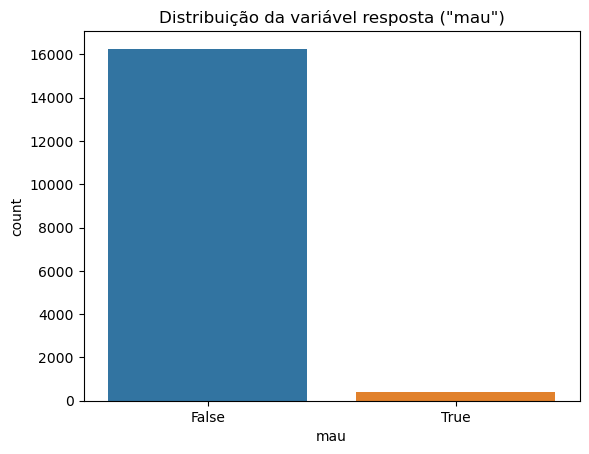

In [13]:
# Para uma variável categórica
sns.countplot(x='mau', data=dados)
plt.title('Distribuição da variável resposta ("mau")')
plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [14]:
# Obtendo informações sobre as variáveis e seus tipos de dados
info_variaveis = pd.DataFrame({
    'Nome': dados.columns,
    'Tipo de Dados': dados.dtypes
})

# Adicionando a coluna 'qtd_categorias'
qtd_categorias = []

for coluna in dados.columns:
    if dados[coluna].dtype == 'object':
        # Se for uma variável qualitativa, contar o número de categorias únicas
        qtd_categorias.append(len(dados[coluna].unique()))
    else:
        # Se for uma variável numérica, atribuir NaN
        qtd_categorias.append(None)

info_variaveis['qtd_categorias'] = qtd_categorias

# Exibindo o DataFrame resultante
print(info_variaveis)

# Criando variáveis dummy para as variáveis qualitativas
variaveis_qualitativas = info_variaveis[info_variaveis['Tipo de Dados'] == 'object']['Nome'].tolist()

# Criando variáveis dummy usando o método get_dummies do pandas
dados_dummy = pd.get_dummies(dados, columns=variaveis_qualitativas, drop_first=True)

# Exibindo as primeiras linhas do DataFrame com variáveis dummy
print(dados_dummy.head())

                                        Nome Tipo de Dados  qtd_categorias
sexo                                    sexo        object             2.0
posse_de_veiculo            posse_de_veiculo        object             2.0
posse_de_imovel              posse_de_imovel        object             2.0
qtd_filhos                        qtd_filhos         int64             NaN
tipo_renda                        tipo_renda        object             5.0
educacao                            educacao        object             5.0
estado_civil                    estado_civil        object             5.0
tipo_residencia              tipo_residencia        object             6.0
idade                                  idade       float64             NaN
tempo_emprego                  tempo_emprego       float64             NaN
possui_celular                possui_celular         int64             NaN
possui_fone_comercial  possui_fone_comercial         int64             NaN
possui_fone              

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [15]:
# Definindo as variáveis categóricas com mais de 2 categorias
variaveis_qualitativas = ['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Criando variáveis dummy para as variáveis qualitativas
dados_dummy = pd.get_dummies(dados, columns=variaveis_qualitativas, drop_first=True)

# Separando as variáveis de entrada (X) e a variável de saída (y)
X = dados_dummy.drop(columns=['mau']) 
y = dados['mau']

# Exibindo as primeiras linhas do DataFrame com variáveis dummy
print(X.head())

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  sexo posse_de_veiculo posse_de_imovel  qtd_filhos      idade  tempo_emprego  \
0    M                Y               Y           0  58.832877       3.106849   
1    F                N               Y           0  52.356164       8.358904   
2    F                N               Y           0  52.356164       8.358904   
3    M                Y               Y           0  46.224658       2.106849   
4    F                Y               N           0  29.230137       3.021918   

   possui_celular  possui_fone_comercial  possui_fone  possui_email  ...  \
0               1                      0            0             0  ...   
1               1                      0            1             1  ...   
2               1                      0            1             1  ...   
3               1                      1            1             1  ...   
4               1                      0            0             0  ...   

   educacao_Secondary / secondary special  estado_civil_

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [12]:
# Selecionando as variáveis de interesse
variaveis_interesse = ['possui_email', 'posse_de_veiculo', 'mau']
dados_selecionados = dados[variaveis_interesse]

# Criando a tabela cruzada
tabela_cruzada = pd.crosstab(index=dados_selecionados['possui_email'], columns=[dados_selecionados['posse_de_veiculo'], dados_selecionados['mau']], margins=True, margins_name='Total')

# Exibindo a tabela cruzada
print(tabela_cruzada)

posse_de_veiculo     N          Y       Total
mau              False True False True       
possui_email                                 
0                 9108  233  5702  127  15170
1                  823   14   627   16   1480
Total             9931  247  6329  143  16650


In [8]:
# Para aqueles que não possuem email (possui_email=0), a proporção de mau=True é mais elevada em comparação com aqueles que possuem email (possui_email=1).
# A diferença nas proporções sugere que a variável possui_email parece ser mais poderosa para prever a probabilidade de mau=True.
# Portanto, com base nos dados apresentados, a variável possui_email parece mais poderosa para prever a probabilidade de mau=True.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [9]:
dados.to_csv('dados_tarefa2.csv', index=False)